In [1]:
!pip install tensorflow==2.12.1

Image Classification Tool for Google Colab
Class Labels: 0-Strawberry, 1-Pineapple, 2-Raspberry


Please upload an image file...


Saving r_10_100.jpg to r_10_100.jpg


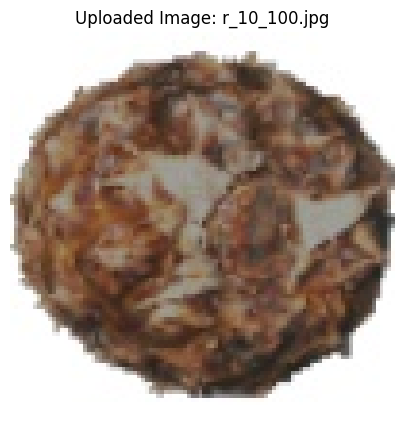

1/1 [==============================] - 1s 1s/step

Predicted Class: 1 Pineapple
Confidence Score: 99.98%

All class probabilities:
- 0 Strawberry: 0.01%
- 1 Pineapple: 99.98%
- 2 Raspberry: 0.01%


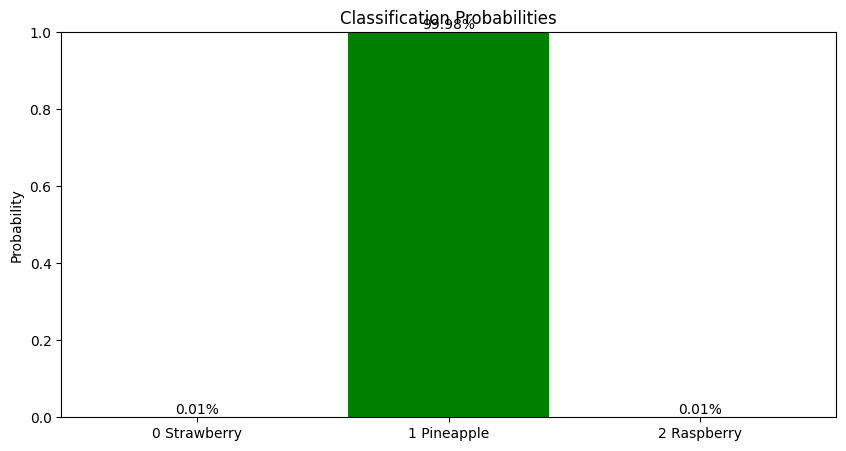


Would you like to analyze another image? (yes/no): yes

Please upload an image file...


Saving r_23_100.jpg to r_23_100.jpg


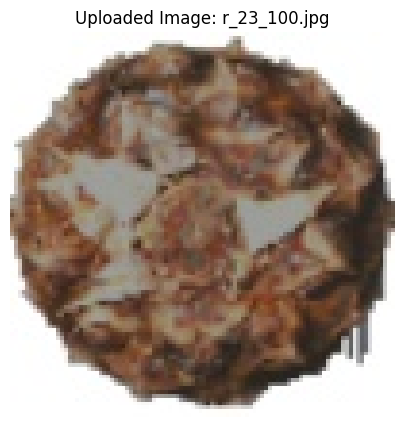

1/1 [==============================] - 0s 44ms/step

Predicted Class: 1 Pineapple
Confidence Score: 100.00%

All class probabilities:
- 0 Strawberry: 0.00%
- 1 Pineapple: 100.00%
- 2 Raspberry: 0.00%


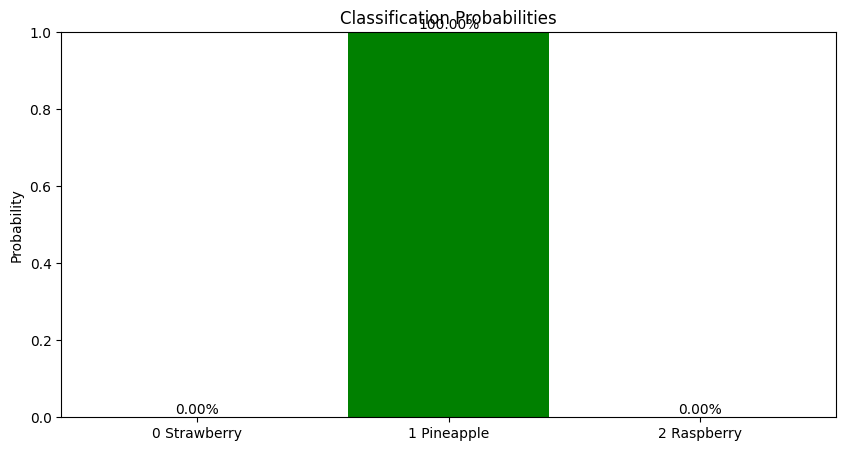


Would you like to analyze another image? (yes/no): yes

Please upload an image file...


Saving r_230_100.jpg to r_230_100.jpg


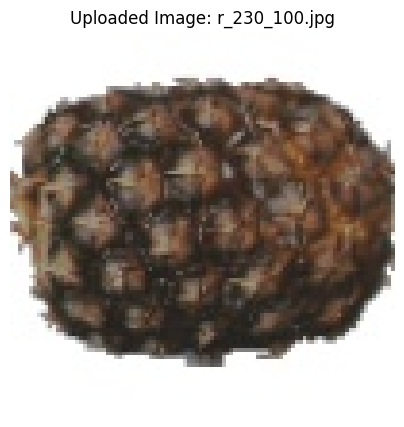

1/1 [==============================] - 0s 55ms/step

Predicted Class: 1 Pineapple
Confidence Score: 99.98%

All class probabilities:
- 0 Strawberry: 0.00%
- 1 Pineapple: 99.98%
- 2 Raspberry: 0.01%


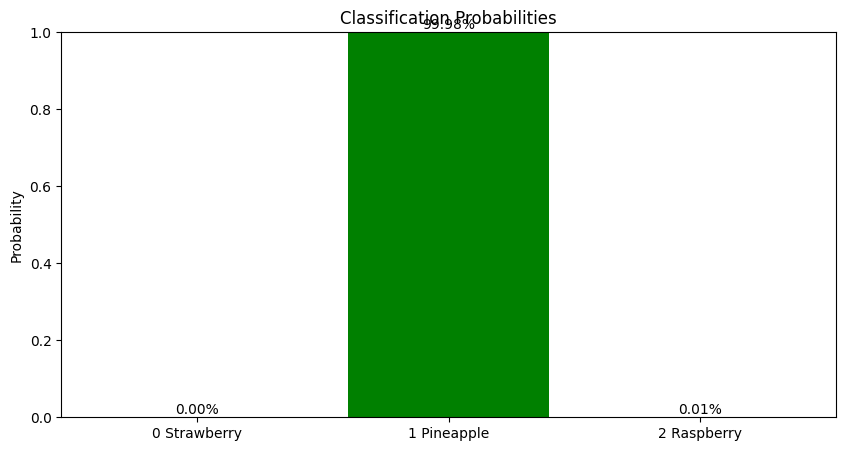


Would you like to analyze another image? (yes/no): yes

Please upload an image file...


Saving 140_100.jpg to 140_100.jpg


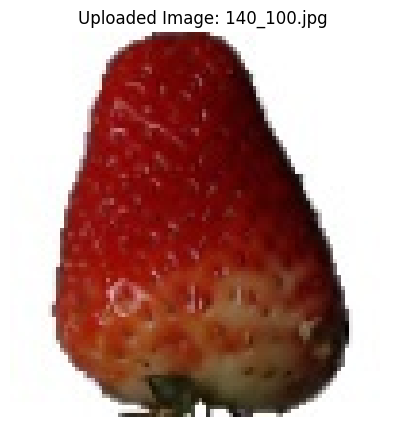

1/1 [==============================] - 0s 54ms/step

Predicted Class: 0 Strawberry
Confidence Score: 99.99%

All class probabilities:
- 0 Strawberry: 99.99%
- 1 Pineapple: 0.00%
- 2 Raspberry: 0.00%


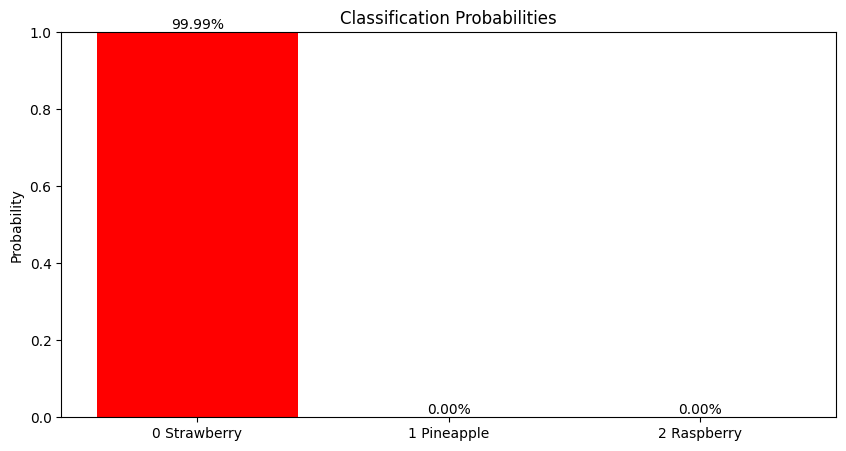


Would you like to analyze another image? (yes/no): yes

Please upload an image file...


Saving 75_100.jpg to 75_100.jpg


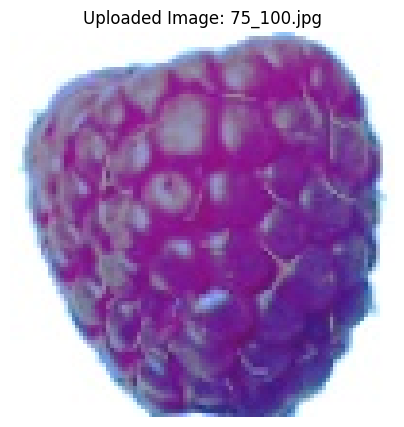

1/1 [==============================] - 0s 42ms/step

Predicted Class: 2 Raspberry
Confidence Score: 99.99%

All class probabilities:
- 0 Strawberry: 0.00%
- 1 Pineapple: 0.00%
- 2 Raspberry: 99.99%


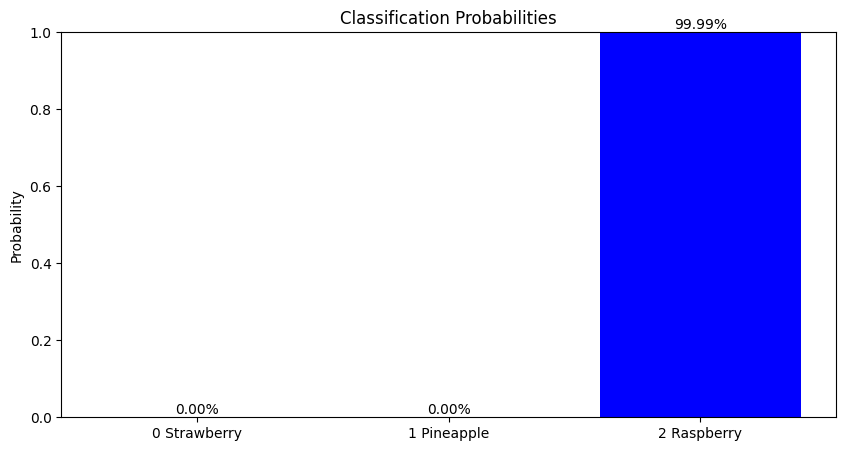


Would you like to analyze another image? (yes/no): no
Thank you for using the Image Classification Tool!


In [14]:
import numpy as np
from keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from google.colab import files
import io

def load_model_and_labels(model_path="/content/keras_model.h5", labels_path="labels.txt"):
    """Load the trained model and class labels"""
    try:
        model = load_model(model_path, compile=False)
        class_names = [line.strip() for line in open(labels_path, "r").readlines()]
        return model, class_names
    except Exception as e:
        print(f"Error loading model or labels: {e}")
        return None, None

def upload_and_preprocess_image(target_size=(224, 224)):
    """Upload and preprocess the image for prediction"""
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded. Exiting.")
        return None, None

    # Get the first uploaded file
    file_name = next(iter(uploaded))
    image_data = uploaded[file_name]

    try:
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        # Display the original image
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.title(f"Uploaded Image: {file_name}")
        plt.axis('off')
        plt.show()

        # Resize and normalize
        image = ImageOps.fit(image, target_size, Image.Resampling.LANCZOS)
        image_array = np.asarray(image)
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

        # Create the input data array
        data = np.ndarray(shape=(1, *target_size, 3), dtype=np.float32)
        data[0] = normalized_image_array

        return data, image
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None

def predict_image_class(model, class_names, image_data):
    """Make prediction and return results"""
    try:
        prediction = model.predict(image_data)
        index = np.argmax(prediction)
        class_name = class_names[index]
        confidence_score = prediction[0][index]
        return class_name, confidence_score, prediction
    except Exception as e:
        print(f"Error making prediction: {e}")
        return None, None, None

def display_results(class_name, confidence_score, class_names, prediction):
    """Display the prediction results"""
    print("\n" + "="*50)
    print(f"Predicted Class: {class_name}")
    print(f"Confidence Score: {confidence_score:.2%}")
    print("="*50 + "\n")

    # Display all class probabilities
    print("All class probabilities:")
    for name, prob in zip(class_names, prediction[0]):
        print(f"- {name}: {prob:.2%}")

    # Visualization
    plt.figure(figsize=(10, 5))
    bars = plt.bar(class_names, prediction[0], color=['red', 'green', 'blue'])
    plt.title("Classification Probabilities")
    plt.ylabel("Probability")
    plt.ylim(0, 1)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2%}',
                 ha='center', va='bottom')

    plt.show()

def main():
    print("="*50)
    print("Image Classification Tool for Google Colab")
    print("Class Labels: 0-Strawberry, 1-Pineapple, 2-Raspberry")
    print("="*50 + "\n")

    # Load model and labels
    model, class_names = load_model_and_labels()
    if model is None or class_names is None:
        return

    while True:
        print("\nPlease upload an image file...")
        image_data, image = upload_and_preprocess_image()

        if image_data is None:
            another = input("Would you like to try again? (yes/no): ").strip().lower()
            if another not in ['yes', 'y']:
                break
            continue

        class_name, confidence_score, prediction = predict_image_class(model, class_names, image_data)
        if class_name is None:
            another = input("Would you like to try another image? (yes/no): ").strip().lower()
            if another not in ['yes', 'y']:
                break
            continue

        # Display results
        display_results(class_name, confidence_score, class_names, prediction)

        # Ask if user wants to try another image
        another = input("\nWould you like to analyze another image? (yes/no): ").strip().lower()
        if another not in ['yes', 'y']:
            print("Thank you for using the Image Classification Tool!")
            break

if __name__ == "__main__":
    main()